# Co-add spectra along nebular axis

In [1]:
from pathlib import Path
import yaml
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.convolution import Gaussian2DKernel, convolve_fft
from matplotlib import pyplot as plt
import seaborn as sns

import mes_longslit as mes

In [2]:
dpath = Path.cwd().parent / "data"
pvpath = dpath / "pvextract"

In [3]:
slit_db_list = yaml.safe_load(
    (dpath / "slits-ha.yml").read_text()
)

Find list of all ha slits that are close to axis. Use ones that mention "center" in their comments.

In [4]:
id_list = [_["slit_id"] for _ in slit_db_list if "center" in _["comment"]]

In [5]:
id_list

['N10036',
 'N20012',
 'spm0048o',
 'spm0054o',
 'spm0105o',
 'spm0211o',
 'spm0432o']

In [6]:
_id = id_list[0]

In [7]:
hdu, = fits.open(pvpath / f"{_id}-ha.fits")

In [8]:
w = WCS(hdu.header, key="A")
w

WCS Keywords

Number of WCS axes: 3
CTYPE : 'AWAV'  'RA---TAN'  'DEC--TAN'  
CRVAL : 6.5577767803892e-07  318.58461345881  43.645363660227  
CRPIX : 1.0  1.0  1.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  -0.0039645479926298  -0.99999214114873  
PC3_1 PC3_2 PC3_3  : 0.0  0.99999214114873  -0.0039645479926298  
CDELT : 5.466290563345e-12  9.7371246546866e-05  9.7371246546866e-05  
NAXIS : 183  998  1

In [9]:
w.wcs.restwav

6.56279e-07

In [10]:
hdu.header["WEIGHT"]

0.5956792141544897

In [11]:
w0 = WCS(hdu.header).sub(2)
w0

WCS Keywords

Number of WCS axes: 2
CTYPE : 'LINEAR'  'LINEAR'  
CRVAL : 6557.7767803892  0.0  
CRPIX : 1.0  481.10893041177  
CD1_1 CD1_2  : 1.0  0.0  
CD2_1 CD2_2  : 0.0  0.0546629056334496  
NAXIS : 183  998

[]

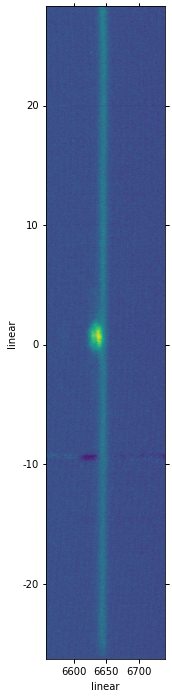

In [12]:
fig, ax = plt.subplots(
    figsize=(5, 12),
    subplot_kw=dict(projection=w0)
)
ax.imshow(hdu.data[0])
ax.set(
#    ylim=[-10, 10],
)

In [13]:
T = ax.get_transform("world")

In [14]:
T.transform_point([6563.0, 0])

array([128.43395853, 422.13909568])

In [15]:
c0 = SkyCoord("21 14 20.03 +43 41 36.0", unit=(u.hourangle, u.deg))
c0.ra.deg, c0.dec.deg

(318.58345833333334, 43.69333333333333)

In [16]:
mes.convert_pv_offset_vels(c0.ra.deg, c0.dec.deg, line_id="ha", verbose=True)

Processing /Users/will/Dropbox/teresa-pn-ou5/data/pvextract/spm0105o-ha.fits
Writing /Users/will/Dropbox/teresa-pn-ou5/data/pv-offset-vels/spm0105o-ha-PA000-sep-003.fits
Processing /Users/will/Dropbox/teresa-pn-ou5/data/pvextract/spm0440o-ha.fits
Writing /Users/will/Dropbox/teresa-pn-ou5/data/pv-offset-vels/spm0440o-ha-PA085-sep+000.fits
Processing /Users/will/Dropbox/teresa-pn-ou5/data/pvextract/spm0054o-ha.fits
Writing /Users/will/Dropbox/teresa-pn-ou5/data/pv-offset-vels/spm0054o-ha-PA000-sep+000.fits
Processing /Users/will/Dropbox/teresa-pn-ou5/data/pvextract/spm0211o-ha.fits
Writing /Users/will/Dropbox/teresa-pn-ou5/data/pv-offset-vels/spm0211o-ha-PA000-sep+000.fits
Processing /Users/will/Dropbox/teresa-pn-ou5/data/pvextract/spm0048o-ha.fits
Writing /Users/will/Dropbox/teresa-pn-ou5/data/pv-offset-vels/spm0048o-ha-PA000-sep+001.fits
Processing /Users/will/Dropbox/teresa-pn-ou5/data/pvextract/N10036-ha.fits
Writing /Users/will/Dropbox/teresa-pn-ou5/data/pv-offset-vels/N10036-ha-PA3

In [17]:
mes.convert_pv_offset_vels(c0.ra.deg, c0.dec.deg, line_id="oiii", verbose=True)

Processing /Users/will/Dropbox/teresa-pn-ou5/data/pvextract/N10045-oiii.fits
Writing /Users/will/Dropbox/teresa-pn-ou5/data/pv-offset-vels/N10045-oiii-PA359-sep+005.fits
Processing /Users/will/Dropbox/teresa-pn-ou5/data/pvextract/N10039-oiii.fits
Writing /Users/will/Dropbox/teresa-pn-ou5/data/pv-offset-vels/N10039-oiii-PA359-sep+002.fits
Processing /Users/will/Dropbox/teresa-pn-ou5/data/pvextract/spm0056o-oiii.fits
Writing /Users/will/Dropbox/teresa-pn-ou5/data/pv-offset-vels/spm0056o-oiii-PA000-sep+000.fits
Processing /Users/will/Dropbox/teresa-pn-ou5/data/pvextract/N20006-oiii.fits
Writing /Users/will/Dropbox/teresa-pn-ou5/data/pv-offset-vels/N20006-oiii-PA359-sep+004.fits
Processing /Users/will/Dropbox/teresa-pn-ou5/data/pvextract/spm0023o-oiii.fits
Writing /Users/will/Dropbox/teresa-pn-ou5/data/pv-offset-vels/spm0023o-oiii-PA000-sep+008.fits
Processing /Users/will/Dropbox/teresa-pn-ou5/data/pvextract/spm0050o-oiii.fits
Writing /Users/will/Dropbox/teresa-pn-ou5/data/pv-offset-vels/s

In [18]:
mes.convert_pv_offset_vels(c0.ra.deg, c0.dec.deg, line_id="heii", verbose=True)

Processing /Users/will/Dropbox/teresa-pn-ou5/data/pvextract/spm0105o-heii.fits
Writing /Users/will/Dropbox/teresa-pn-ou5/data/pv-offset-vels/spm0105o-heii-PA000-sep-003.fits
Processing /Users/will/Dropbox/teresa-pn-ou5/data/pvextract/N10036-heii.fits
Writing /Users/will/Dropbox/teresa-pn-ou5/data/pv-offset-vels/N10036-heii-PA359-sep+002.fits
Processing /Users/will/Dropbox/teresa-pn-ou5/data/pvextract/spm0440o-heii.fits
Writing /Users/will/Dropbox/teresa-pn-ou5/data/pv-offset-vels/spm0440o-heii-PA085-sep+000.fits
Processing /Users/will/Dropbox/teresa-pn-ou5/data/pvextract/spm0021o-heii.fits
Writing /Users/will/Dropbox/teresa-pn-ou5/data/pv-offset-vels/spm0021o-heii-PA000-sep+008.fits
Processing /Users/will/Dropbox/teresa-pn-ou5/data/pvextract/N20004-heii.fits
Writing /Users/will/Dropbox/teresa-pn-ou5/data/pv-offset-vels/N20004-heii-PA359-sep+004.fits
Processing /Users/will/Dropbox/teresa-pn-ou5/data/pvextract/spm0215o-heii.fits
Writing /Users/will/Dropbox/teresa-pn-ou5/data/pv-offset-ve

In [19]:
pvpath = dpath / "pv-offset-vels"

In [20]:
def fkey(filepath):
    "Extract integer slit offset for sorting"
    stem = str(filepath.stem).replace("-regrid", "")
    return int(stem[-4:])

In [21]:
file_list = sorted(pvpath.glob("*-oiii-*.fits"), key=fkey)
[_.stem for _ in file_list]

['spm0107o-oiii-PA000-sep-002',
 'spm0056o-oiii-PA000-sep+000',
 'N10039-oiii-PA359-sep+002',
 'spm0050o-oiii-PA000-sep+003',
 'N20006-oiii-PA359-sep+004',
 'N10045-oiii-PA359-sep+005',
 'spm0023o-oiii-PA000-sep+008']

In [22]:
id_list

['N10036',
 'N20012',
 'spm0048o',
 'spm0054o',
 'spm0105o',
 'spm0211o',
 'spm0432o']

Look at a single slit

In [23]:
hdu, = fits.open(file_list[3])

In [24]:
w = WCS(hdu.header)
w

WCS Keywords

Number of WCS axes: 2
CTYPE : 'VHEL'  'LINEAR'  
CRVAL : -284.80661703516  0.0  
CRPIX : 1.0  317.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 3.8591890042708  0.52596317763293  
NAXIS : 155  655

In [25]:
hdu.header["OFFSET"], hdu.header["WEIGHT"]

(3.013879171113169, 3.57475841997416)

[(44.51883979899117, 85.97832774398034),
 (258.9617865360586, 373.0382134639414)]

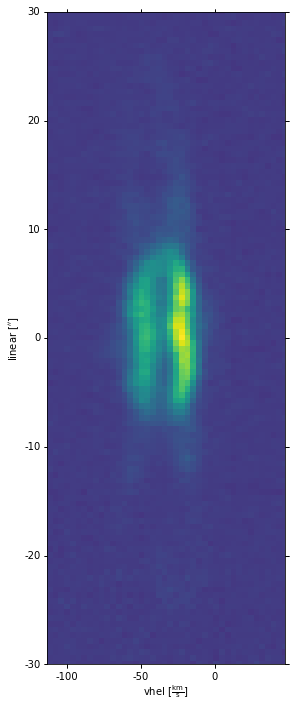

In [26]:
fig, ax = plt.subplots(
    figsize=(5, 12),
    subplot_kw=dict(projection=w)
)

vsys = -33
v1, v2 = vsys - 80, vsys + 80
s1, s2 = -30, 30
xlims, ylims = w.world_to_pixel_values([v1, v2], [s1, s2])

y1, y2 = [int(_) for _ in ylims]
bg1 = np.median(hdu.data[y1-10:y1+10], axis=0)
bg2 = np.median(hdu.data[y2-10:y2+10], axis=0)
im = hdu.data - 0.5 * (bg1 + bg2)
ax.imshow(im)
ax.set(
    xlim=xlims,
    ylim=ylims,
)

## Look at all the [O III] slits

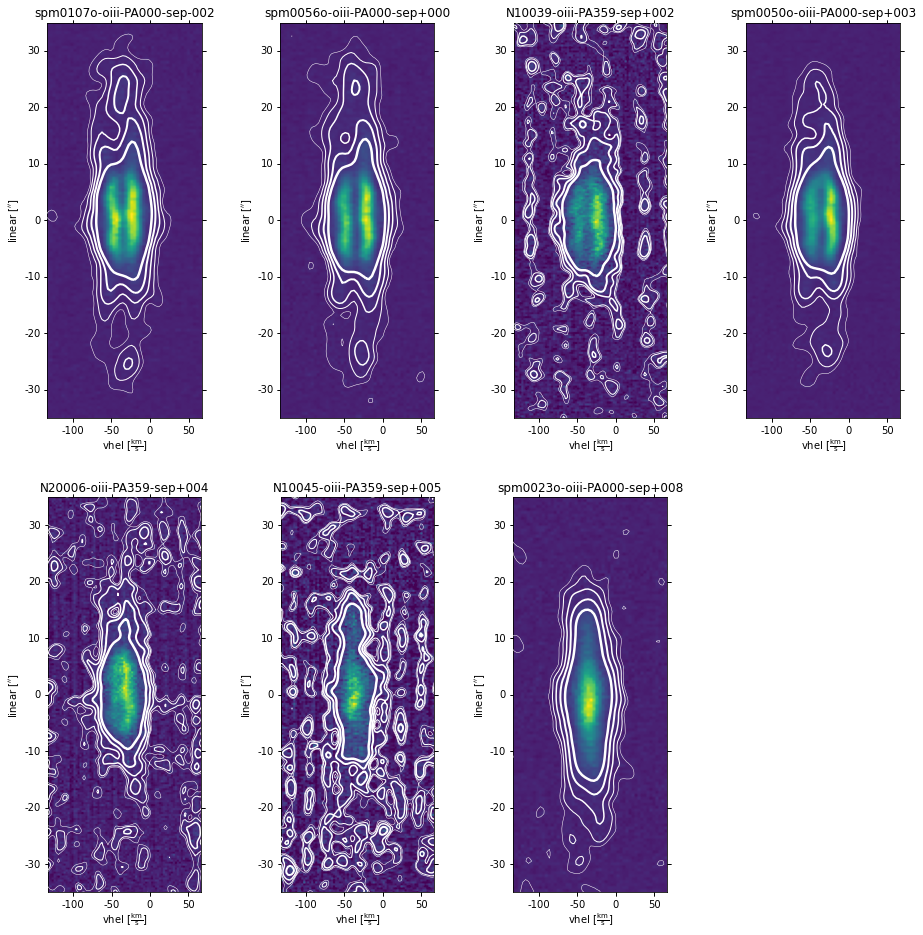

In [27]:
file_list = sorted(pvpath.glob("*-oiii-*.fits"), key=fkey)

N = len(file_list)
ncols = 4
nrows = (N // ncols) + 1
fig = plt.figure(figsize=(4 * ncols, 8 * nrows))

vsys = -33
v1, v2 = vsys - 100, vsys + 100
s1, s2 = -35, 35

kernel = Gaussian2DKernel(x_stddev=2.0)
for i, filepath in enumerate(file_list):
    hdu, = fits.open(filepath)
    w = WCS(hdu.header)
    ax = plt.subplot(nrows, ncols, i + 1, projection=w)
    xlims, ylims = w.world_to_pixel_values([v1, v2], [s1, s2])
    y1, y2 = [int(_) for _ in ylims]
    bg1 = np.median(hdu.data[y1-10:y1+10], axis=0)
    bg2 = np.median(hdu.data[y2-10:y2+10], axis=0)
    im = hdu.data - 0.5 * (bg1 + bg2)
    im /= im.max()
    ax.imshow(im, vmin=-0.1, vmax=1.0)
    ims = convolve_fft(im, kernel)
    ax.contour(
        ims, 
        levels=[0.005, 0.01, 0.02, 0.04, 0.08], 
        colors="w",
        linewidths=[0.5, 1.0, 1.5, 2.0, 2.5],
    )

    ax.set(xlim=xlims, ylim=ylims)
    ax.set_title(filepath.stem)
...;

Regrid all the oiii slits and save to files

In [28]:
pvpath2 = pvpath.parent / "pv-common"
pvpath2.mkdir(exist_ok=True)

In [29]:
for filepath in file_list:
    hdu, = fits.open(filepath)
    hdu2 = mes.regrid_pv(hdu)
    filepath2 = pvpath2 / f"{filepath.stem}-regrid.fits" 
    hdu2.writeto(filepath2, overwrite=True)

Take a look at the new regridded PV spectra

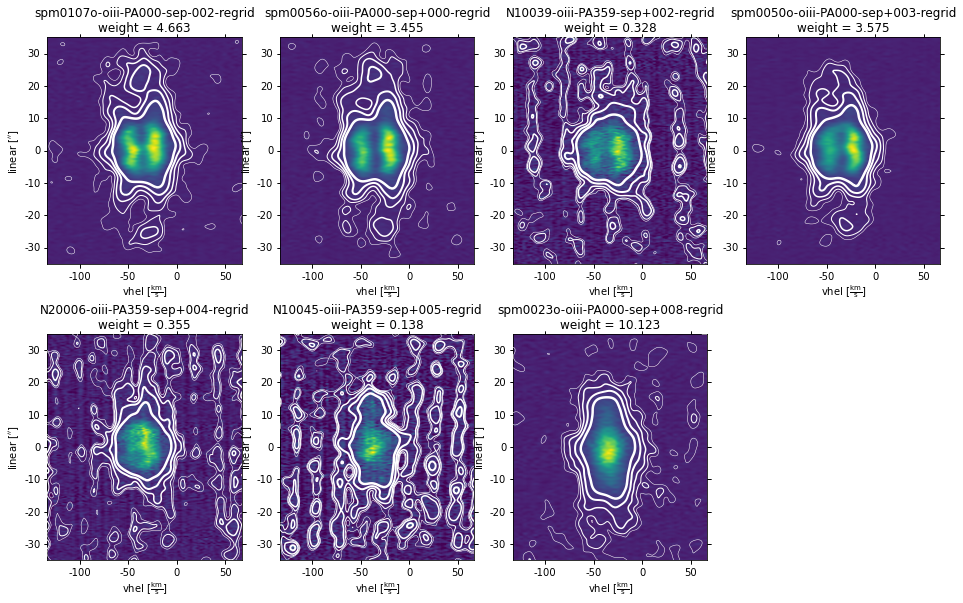

In [30]:
file_list = sorted(pvpath2.glob("*-oiii-*.fits"), key=fkey)

N = len(file_list)
ncols = 4
nrows = (N // ncols) + 1
fig = plt.figure(figsize=(4 * ncols, 5 * nrows))

vsys = -33
v1, v2 = vsys - 100, vsys + 100
s1, s2 = -35, 35

kernel = Gaussian2DKernel(x_stddev=4.0)
for i, filepath in enumerate(file_list):
    hdu, = fits.open(filepath)
    w = WCS(hdu.header)
    ax = plt.subplot(nrows, ncols, i + 1, projection=w)
    xlims, ylims = w.world_to_pixel_values([v1, v2], [s1, s2])
    y1, y2 = [int(_) for _ in ylims]
    bg1 = np.median(hdu.data[y1-10:y1+10], axis=0)
    bg2 = np.median(hdu.data[y2-10:y2+10], axis=0)
    im = hdu.data - 0.5 * (bg1 + bg2)
    im /= im.max()
    ax.imshow(im, vmin=-0.1, vmax=1.0)
    ims = convolve_fft(im, kernel)
    ax.contour(
        ims, 
        levels=[0.005, 0.01, 0.02, 0.04, 0.08], 
        colors="w",
        linewidths=[0.5, 1.0, 1.5, 2.0, 2.5],
    )

    ax.set(xlim=xlims, ylim=ylims)
    ax.set_title(filepath.stem + f"\nweight = {hdu.header['WEIGHT']:.3f}")
...;

This looks good, except for the noise, which has gone a bit weird.  Now we choose the best spectra tho combine. 

Looks like first 4

In [31]:
selected = 0, 1, 2, 3
imlist = []
weightsum = 0.0

for isel in selected:
    hdu, = fits.open(file_list[isel])
    weight =  hdu.header["WEIGHT"]
    imlist.append(weight * hdu.data)
    weightsum += weight
    
hdu.data = np.sum(np.stack(imlist, axis=0), axis=0) / weightsum
hdu.writeto(pvpath2 / "oiii-pv-coadd.fits", overwrite=True)




## Repeat for all the Ha slits

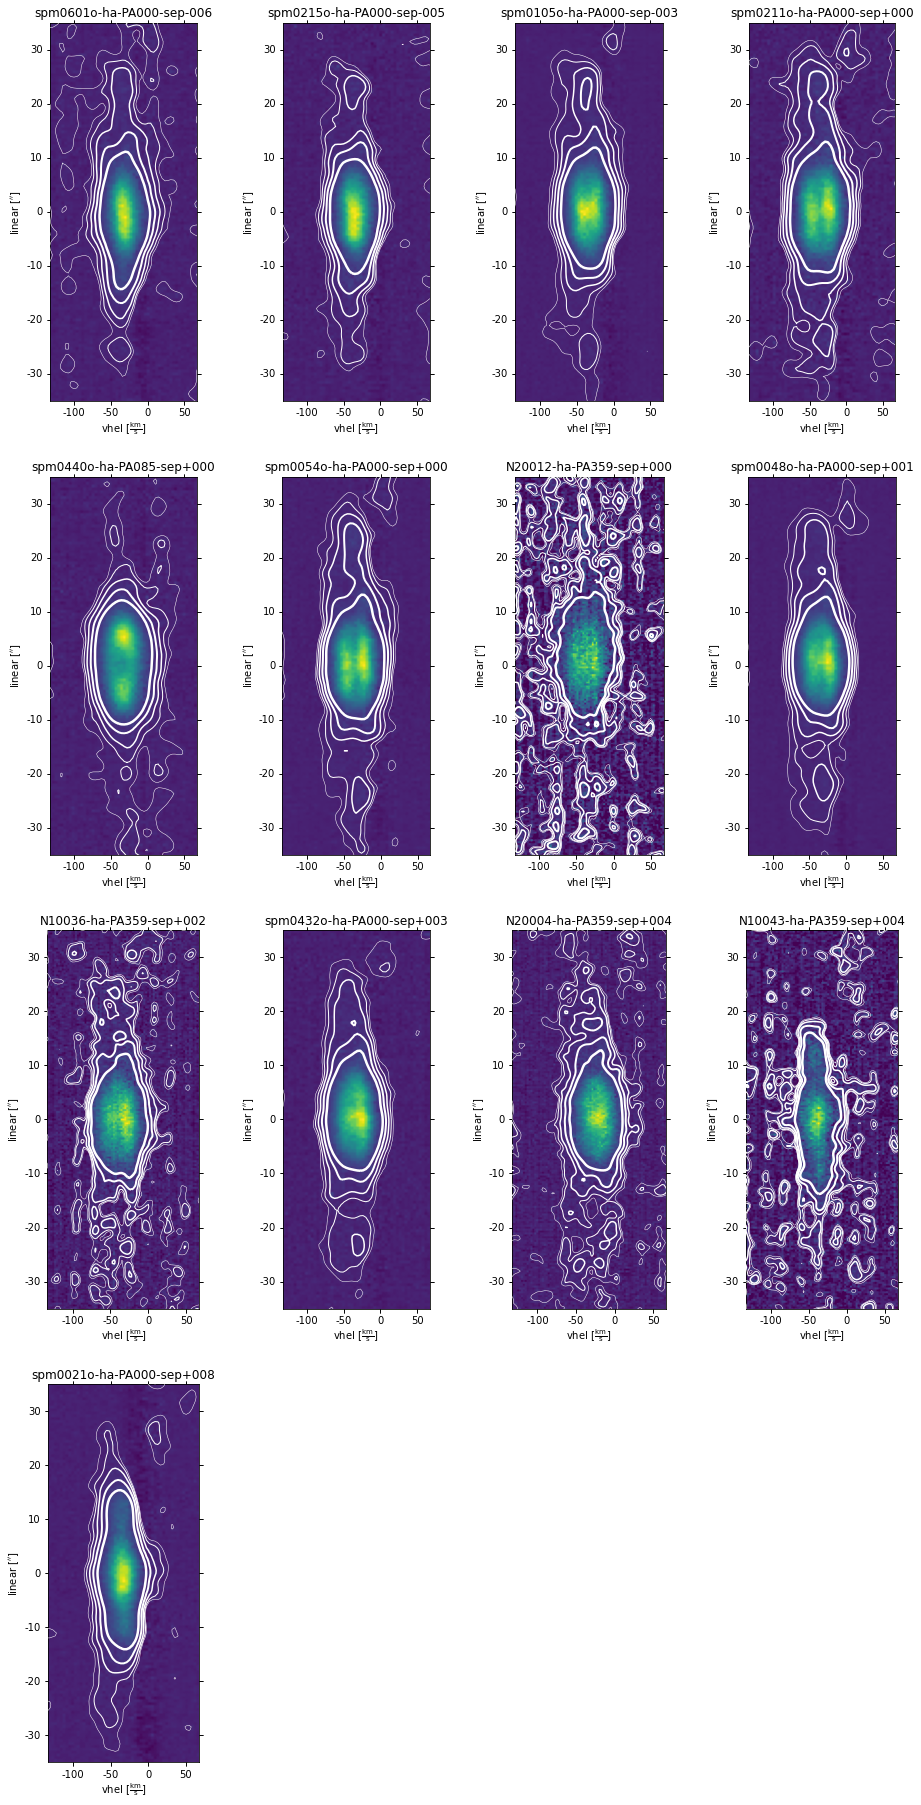

In [32]:
file_list = sorted(pvpath.glob("*-ha-*.fits"), key=fkey)

N = len(file_list)
ncols = 4
nrows = (N // ncols) + 1
fig = plt.figure(figsize=(4 * ncols, 8 * nrows))

vsys = -33
v1, v2 = vsys - 100, vsys + 100
s1, s2 = -35, 35

kernel = Gaussian2DKernel(x_stddev=2.0)
for i, filepath in enumerate(file_list):
    hdu, = fits.open(filepath)
    w = WCS(hdu.header)
    ax = plt.subplot(nrows, ncols, i + 1, projection=w)
    xlims, ylims = w.world_to_pixel_values([v1, v2], [s1, s2])
    y1, y2 = [int(_) for _ in ylims]
    bg1 = np.median(hdu.data[y1-10:y1], axis=0)
    bg2 = np.median(hdu.data[y2:y2+10], axis=0)
    im = hdu.data - 0.5 * (bg1 + bg2)
    im /= im.max()
    ax.imshow(im, vmin=-0.1, vmax=1.0)
    ims = convolve_fft(im, kernel)
    ax.contour(
        ims, 
        levels=[0.005, 0.01, 0.02, 0.04, 0.08], 
        colors="w",
        linewidths=[0.5, 1.0, 1.5, 2.0, 2.5],
    )

    ax.set(xlim=xlims, ylim=ylims)
    ax.set_title(filepath.stem)
...;

In [33]:
for filepath in file_list:
    hdu, = fits.open(filepath)
    hdu2 = mes.regrid_pv(hdu)
    filepath2 = pvpath2 / f"{filepath.stem}-regrid.fits" 
    hdu2.writeto(filepath2, overwrite=True)

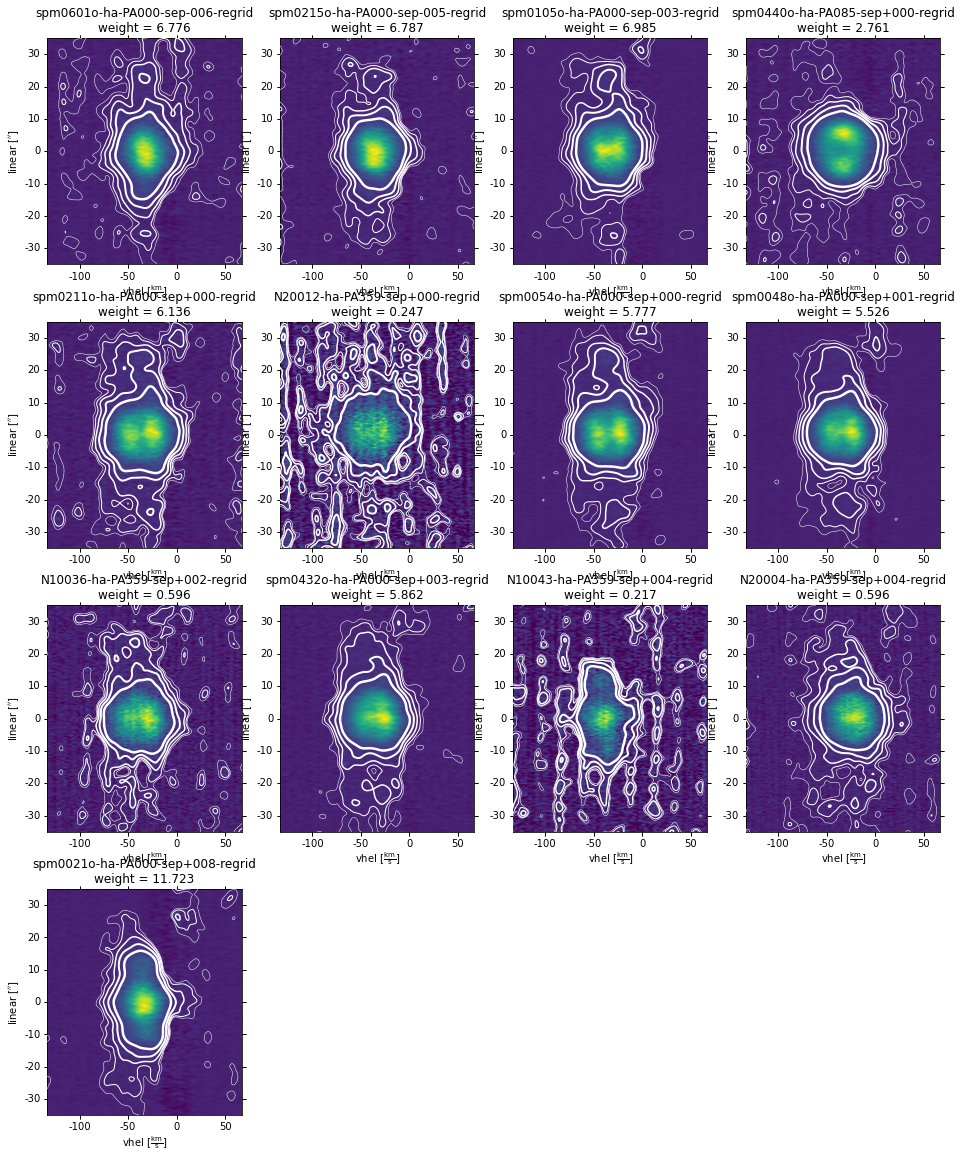

In [34]:
file_list = sorted(pvpath2.glob("*-ha-*.fits"), key=fkey)

N = len(file_list)
ncols = 4
nrows = (N // ncols) + 1
fig = plt.figure(figsize=(4 * ncols, 5 * nrows))

vsys = -33
v1, v2 = vsys - 100, vsys + 100
s1, s2 = -35, 35

kernel = Gaussian2DKernel(x_stddev=4.0)
for i, filepath in enumerate(file_list):
    hdu, = fits.open(filepath)
    w = WCS(hdu.header)
    ax = plt.subplot(nrows, ncols, i + 1, projection=w)
    xlims, ylims = w.world_to_pixel_values([v1, v2], [s1, s2])
    y1, y2 = [int(_) for _ in ylims]
    bg1 = np.median(hdu.data[y1-10:y1], axis=0)
    bg2 = np.median(hdu.data[y2:y2+10], axis=0)
    im = hdu.data - 0.5 * (bg1 + bg2)
    im /= im.max()
    ax.imshow(im, vmin=-0.1, vmax=1.0)
    ims = convolve_fft(im, kernel)
    ax.contour(
        ims, 
        levels=[0.005, 0.01, 0.02, 0.04, 0.08], 
        colors="w",
        linewidths=[0.5, 1.0, 1.5, 2.0, 2.5],
    )

    ax.set(xlim=xlims, ylim=ylims)
    ax.set_title(filepath.stem + f"\nweight = {hdu.header['WEIGHT']:.3f}")
...;

In [35]:
selected = 2, 4, 5, 6, 7, 8, 9
imlist = []
weightsum = 0.0

for isel in selected:
    hdu, = fits.open(file_list[isel])
    weight =  hdu.header["WEIGHT"]
    imlist.append(weight * hdu.data)
    weightsum += weight
    
hdu.data = np.sum(np.stack(imlist, axis=0), axis=0) / weightsum
hdu.writeto(pvpath2 / "ha-pv-coadd.fits", overwrite=True)

## Look at our co-added spectra

In [50]:
import seaborn as sns
sns.set_context("talk")

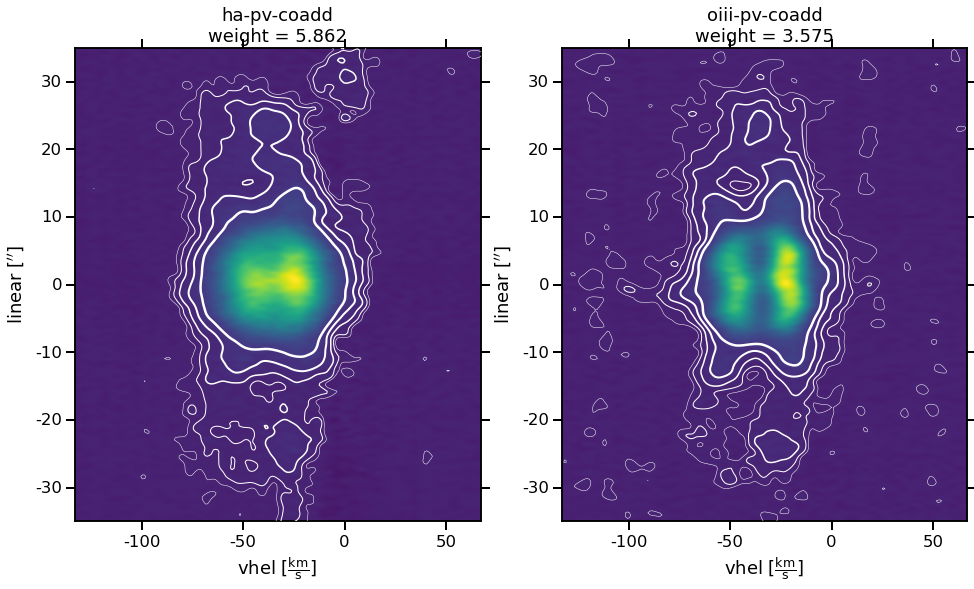

In [51]:
file_list = sorted(pvpath2.glob("*-pv-coadd.fits"))

N = len(file_list)
ncols = 2
nrows = (N // ncols) + 1
fig = plt.figure(figsize=(8 * ncols, 10 * nrows))

vsys = -33
v1, v2 = vsys - 100, vsys + 100
s1, s2 = -35, 35

kernel = Gaussian2DKernel(x_stddev=2.0)
for i, filepath in enumerate(file_list):
    hdu, = fits.open(filepath)
    w = WCS(hdu.header)
    ax = plt.subplot(nrows, ncols, i + 1, projection=w)
    xlims, ylims = w.world_to_pixel_values([v1, v2], [s1, s2])
    y1, y2 = [int(_) for _ in ylims]
    bg1 = np.median(hdu.data[y1-10:y1], axis=0)
    bg2 = np.median(hdu.data[y2:y2+10], axis=0)
    im = hdu.data - 0.5 * (bg1 + bg2)
    im /= im.max()
    ax.imshow(im, vmin=-0.1, vmax=1.0)
    ims = convolve_fft(im, kernel)
    ax.contour(
        ims, 
        levels=[0.005, 0.01, 0.02, 0.04, 0.08], 
        colors="w",
        linewidths=[0.5, 1.0, 1.5, 2.0, 2.5],
    )

    ax.set(xlim=xlims, ylim=ylims)
    ax.set_title(filepath.stem + f"\nweight = {hdu.header['WEIGHT']:.3f}")
...;

### Some comments on the results

Components

#### Inner lobes

Red component is brighter than blue.

#### Outer lobes

Bend towards blue on both sides (N and S)

#### Equatorial high velocity wings
More obvious in oiii. 

#### Polar knots




## Exploratory material

Try out reprojection of a PV onto a common grid.  We will test it with FITS_utils since reproject says it cannot handle non-celestial data

In [36]:
import FITS_tools

In [37]:
hdu0, = fits.open(file_list[6])
hdu1, = fits.open(file_list[8])
weight0 = hdu0.header["WEIGHT"]
weight1 = hdu1.header["WEIGHT"]


hdu10 = fits.PrimaryHDU(
    header=hdu0.header,
    data=FITS_tools.hcongrid.hcongrid(hdu1.data, hdu1.header, hdu0.header),
)
hduav = fits.PrimaryHDU(
    header=hdu0.header,
    data=(hdu10.data * weight1 + hdu0.data * weight0) / (weight1 + weight0),
)

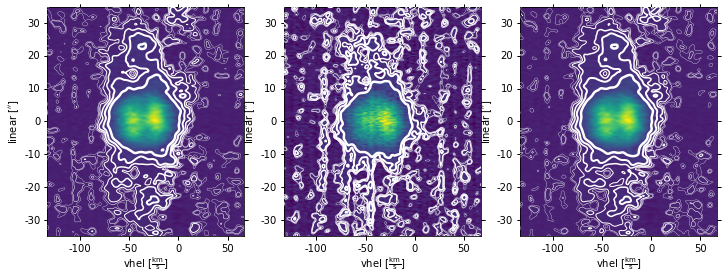

In [38]:
ncols, nrows = 3, 1
fig = plt.figure(figsize=(4 * ncols, 8 * nrows))

vsys = -33
v1, v2 = vsys - 100, vsys + 100
s1, s2 = -35, 35

kernel = Gaussian2DKernel(x_stddev=2.0)
for i, hdu in enumerate([hdu0, hdu1, hduav]):
    w = WCS(hdu.header)
    ax = plt.subplot(nrows, ncols, i + 1, projection=w)
    xlims, ylims = w.world_to_pixel_values([v1, v2], [s1, s2])
    y1, y2 = [int(_) for _ in ylims]
    bg1 = np.median(hdu.data[y1-10:y1], axis=0)
    bg2 = np.median(hdu.data[y2:y2+10], axis=0)
    im = hdu.data - 0.5 * (bg1 + bg2)
    im /= im.max()
    ax.imshow(im, vmin=-0.1, vmax=1.0)
    ims = convolve_fft(im, kernel)
    ax.contour(
        ims, 
        levels=[0.0025, 0.005, 0.01, 0.02, 0.04, 0.08], 
        colors="w",
        linewidths=[0.3, 0.5, 1.0, 1.5, 2.0, 2.5],
    )

    ax.set(xlim=xlims, ylim=ylims)
...;

That seems to have worked fine.  Now we will try it with a pre-defined common grid. Say, 1 km/s and 0.2 arcsec.

In [39]:
FITS_tools.hcongrid.hcongrid_hdu??

Signature: FITS_tools.hcongrid.hcongrid_hdu(hdu_in, header, **kwargs)
Source:   
def hcongrid_hdu(hdu_in, header, **kwargs):
    """
    Wrapper of hcongrid to work on HDUs

    See `hcongrid` for details
    """

    reproj_image = hcongrid(hdu_in.data, hdu_in.header, header, **kwargs)

    return pyfits.PrimaryHDU(data=reproj_image, header=header)
File:      ~/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/FITS_tools/hcongrid.py
Type:      function


In [40]:
WCS(hdu1.header)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'VHEL'  'LINEAR'  
CRVAL : 0.0  0.0  
CRPIX : 256.5  256.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 1.0  0.3  
NAXIS : 512  512

Helium lines. Not very good.

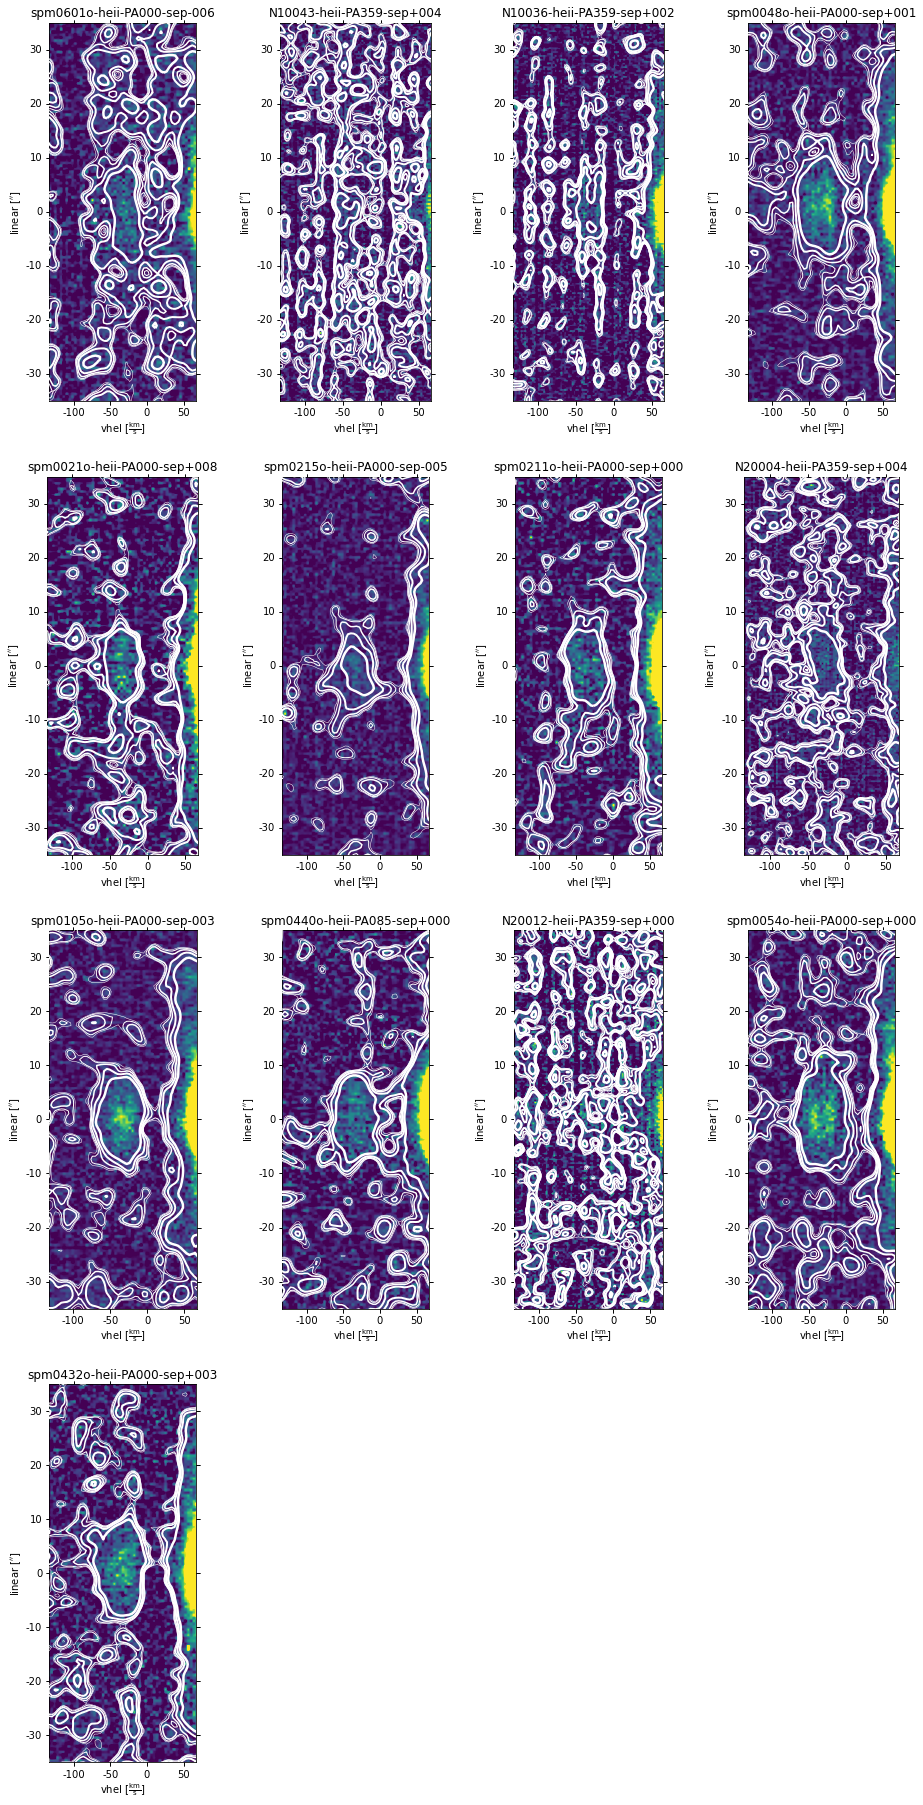

In [41]:
file_list = list(pvpath.glob("*-heii-*.fits"))
N = len(file_list)
ncols = 4
nrows = (N // ncols) + 1
fig = plt.figure(figsize=(4 * ncols, 8 * nrows))

vsys = -33
v1, v2 = vsys - 100, vsys + 100
s1, s2 = -35, 35

kernel = Gaussian2DKernel(x_stddev=2.0)
for i, filepath in enumerate(file_list):
    hdu, = fits.open(filepath)
    w = WCS(hdu.header)
    ax = plt.subplot(nrows, ncols, i + 1, projection=w)
    xlims, ylims = w.world_to_pixel_values([v1, v2], [s1, s2])
    y1, y2 = [int(_) for _ in ylims]
    x1, x2 = [int(_) for _ in xlims]
    bg1 = np.median(hdu.data[y1-10:y1], axis=0)
    bg2 = np.median(hdu.data[y2:y2+10], axis=0)
    im = hdu.data - 0.5 * (bg1 + bg2)
    x0, _ = w.world_to_pixel_values(0.0, 0.0)
    x0 = int(x0)
    im /= im[y1:y2, x1:x0].max()
    ax.imshow(im, vmin=-0.1, vmax=1.0)
    ims = convolve_fft(im, kernel)
    ax.contour(
        ims, 
        levels=[0.005, 0.01, 0.02, 0.04, 0.08], 
        colors="w",
        linewidths=[0.5, 1.0, 1.5, 2.0, 2.5],
    )

    ax.set(xlim=xlims, ylim=ylims)
    ax.set_title(filepath.stem)
...;

In [42]:
x1, x2, x0

(26, 77, 60)

In [43]:
y1, y2

(255, 388)

In [44]:
im[y1:y2, x1:x2].max()

3.3866057